## Supervised Regression 

In [96]:
import numpy as np

In [97]:
image=np.zeros((50,50))# black image

In [98]:
print(image.shape)

(50, 50)


In [99]:
x=10 #column   
y=20#row


In [100]:
image[y][x]=255  

In [101]:
print(image[20][10])

255.0


In [102]:
import matplotlib.pyplot as plt

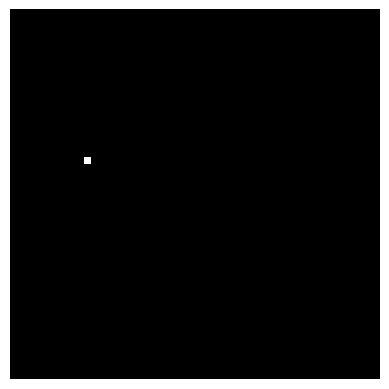

In [103]:
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [104]:
##Random point
x=np.random.randint(0,50)         
y=np.random.randint(0,50)

In [105]:
image[y][x]=255 # white pixel

In [106]:
print("White pixel at:", x, y)

White pixel at: 10 6


In [107]:
#store images and labels
images=[]
labels=[]

In [108]:
for i in range(5000):
    image=np.zeros((50,50))
    x=np.random.randint(0,50)
    y=np.random.randint(0,50)

    image[y][x]=255

    images.append(image)
    labels.append([x,y])

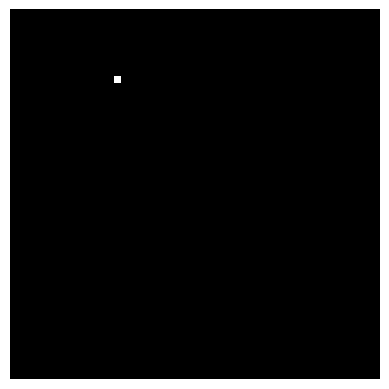

In [109]:
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

## Converting images to numbers

In [110]:
flat_image = image.flatten()

In [111]:
flat_image.shape

(2500,)

In [112]:
print(image.shape)
print(flat_image.shape)

(50, 50)
(2500,)


In [113]:
X=[]
for img in images:
    X.append(img.flatten())

In [114]:
#Labels
y=np.array(labels)

In [115]:
X=np.array(X)
print(X.shape)
print(y.shape)

(5000, 2500)
(5000, 2)


In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [117]:
model = Sequential()

In [118]:
model.add(Dense(128,activation='relu'))

In [119]:
model.add(Dense(64,activation='relu'))

In [120]:
model.add(Dense(2))#Output layer

In [121]:
##Compiling the model
model.compile(
    optimizer='adam',
    loss='mse'
)

## Training the model

In [122]:
history=model.fit(
    X,
    y,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 191.8491 - val_loss: 89.1366
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 30.6198 - val_loss: 54.7581
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 9.7418 - val_loss: 52.3340
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 8.1627 - val_loss: 50.7536
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.7897 - val_loss: 48.8268
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2573 - val_loss: 47.7000
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3947 - val_loss: 47.0905
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8845 - val_loss: 47.6185
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7872 - val_loss: 47.5923
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.0684 - val_loss: 46.9714
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.8676 - val_loss: 46.7596
Epoch 12/100
125/12

## Testing

In [123]:
test_image=np.zeros((50,50))
true_x=np.random.randint(0,50)
true_y=np.random.randint(0,50)

In [124]:
test_image[true_y][true_x]=255

In [125]:
test_input=test_image.flatten().reshape(1,2500)

In [126]:
predicted=model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [127]:
print("Actual position   :", true_x, true_y)
print("Predicted position:", predicted[0][0], predicted[0][1])

Actual position   : 47 30
Predicted position: 43.525967 26.662542


In [128]:
true_coords = []
pred_coords = []

for i in range(100):
    img = np.zeros((50, 50))

    x = np.random.randint(0, 50)
    y = np.random.randint(0, 50)

    img[y][x] = 255

    inp = img.flatten().reshape(1, 2500)
    pred = model.predict(inp)

    true_coords.append([x, y])
    pred_coords.append(pred[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━

In [129]:
true_coords = np.array(true_coords)
pred_coords = np.array(pred_coords)


## ACTUAL vs PREDICTED

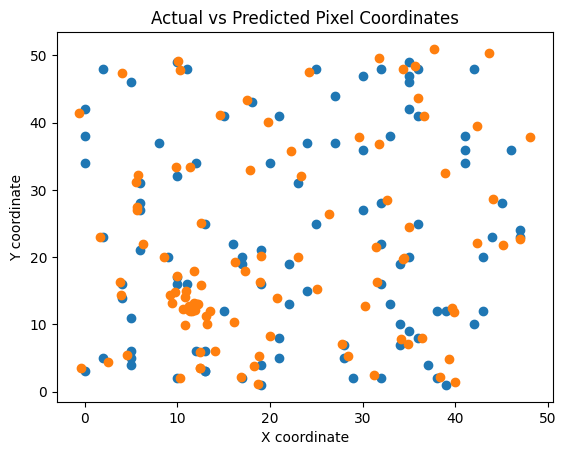

In [130]:
plt.figure()
plt.scatter(true_coords[:, 0], true_coords[:, 1])
plt.scatter(pred_coords[:, 0], pred_coords[:, 1])
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Actual vs Predicted Pixel Coordinates")
plt.show()


## TRAINING LOSS

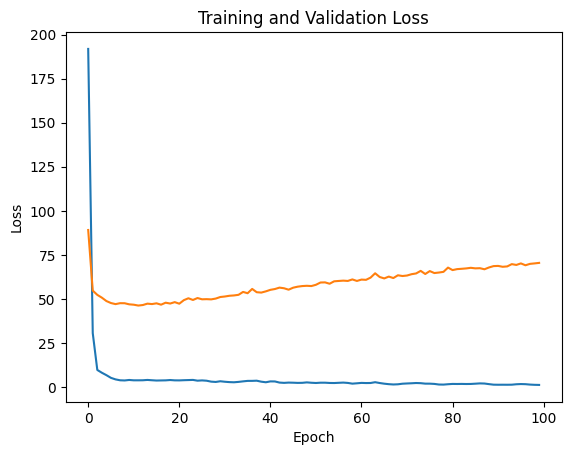

In [131]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()
